In [1]:
# import numpy library

import numpy as np

In [9]:
# the part where we define the function

def generate_sinWave_with_phase_variation(period, Fs, nSamples,noisePerFs,startValue):
    process = np.empty([nSamples,1]);
    noiseVals = np.random.randn(nSamples, 1);
    process[0] = startValue;
    stepSize = period/Fs*2*np.pi; #amount to add on each step

    for i in range(1, nSamples):
        process[i] = process[i-1] + stepSize + noiseVals[i]*noisePerFs;

    sinWave = np.sin(process);
    return np.transpose(sinWave) # need to explicitly return; transpose so that it's one vector with 1000 values
                                 # otherwise python doesn't like it when we try to assign it to sinWaves[:,i] later


In [11]:
# define some variables we need
HzVec = [1, 2, 3, 5, 10]; # frequencies of different sin waves to be generated 
Fs = 100; #sampling frequency of clockface
nSamples = 1000; #total number of samples to generate
period = 1;

timeAxis = np.array(range(1,nSamples))/Fs;
noisePerStep = 0.25; #sigma of noise process to be added at each timestep

sinWaves = np.zeros((nSamples, len(HzVec))) # need to initiate a matrix of zeros
                                            # here it's 1000*5

In [12]:
# now add values to the sinWaves function, column by column

for i in range(0,len(HzVec)):
    startValue = np.random.uniform(0,1)*2*np.pi;
    #print(generate_sinWave_with_phase_variation(HzVec[i],Fs,nSamples,noisePerStep,startValue))
    sinWaves[:,i] = generate_sinWave_with_phase_variation(HzVec[i],Fs,nSamples,noisePerStep,startValue)
    sinWaves = sinWaves * 5*np.sqrt(2); #standard deviation of a sin wave is sqrt(2)/2 - we rescale so that std is now 5

# check the dimensions of sinWaves
print(sinWaves.shape)


(1000, 5)


In [13]:
# import library we need for plotting

import matplotlib.pyplot as plt

In [14]:
# create an array that sums across each row of sinWaves
# i.e., adding signals from all the constitutent sine waves together
timeCourseOverall = sinWaves.sum(axis=1) 

print(timeCourseOverall)


[-18734.03803374 -16853.53641077 -15254.04405819 -12009.2885107
 -13450.65184726  -8390.81156268  -2687.88301279  -4250.11068536
  -1815.93183325    -79.84356275    869.52717678  -1650.98051911
  -3128.74564248   4615.89860538   3316.15766943   -801.42368503
  -1548.79485479   8673.16619258   8362.61954949  11126.94512305
   3918.83717996   4354.43153251  -4437.41324455   4683.59749673
   6172.30756368  10548.43950345   7656.29962549  11202.439832
   9477.33065133  13955.04773507  15734.03611556  16017.14972542
  17108.76098279  18080.03453008  18983.22477308  17893.12955324
  16957.08005642  16495.22199664  17795.0212609   13476.84358539
  11757.12695233  10001.49076592  11662.36918459  14817.31910467
  14753.99905994  15065.85667834  14278.87505355  13050.09138755
  10260.22738632   2344.76421598     31.57128457   7361.29569243
   1515.22023686   4499.48939939   5438.40997704   2912.7591031
   4150.81088319  -4218.21443466 -11678.91578583 -14250.8546997
 -19285.00703632 -19669.176485

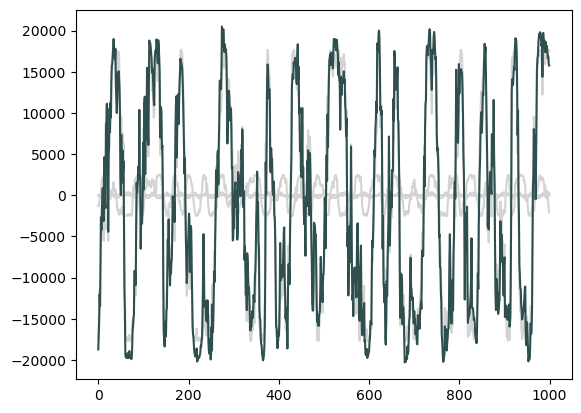

In [15]:
# now plot!
plt.plot(sinWaves, color = 'lightgrey')
plt.plot(timeCourseOverall, color = 'darkslategrey')